In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = (20,10)

In [33]:
df = pd.read_csv(r"C:\Users\Evan\Desktop\Capstone Project\Crime_Data_2019.csv", parse_dates=['DATE_REPORTED', 'DATE_OCCURED'], index_col=0)

In [34]:
df['DAY'] = df.DATE_OCCURED.dt.strftime('%A')

In [35]:
df['ZIP_CODE'] = pd.Categorical(df.ZIP_CODE)

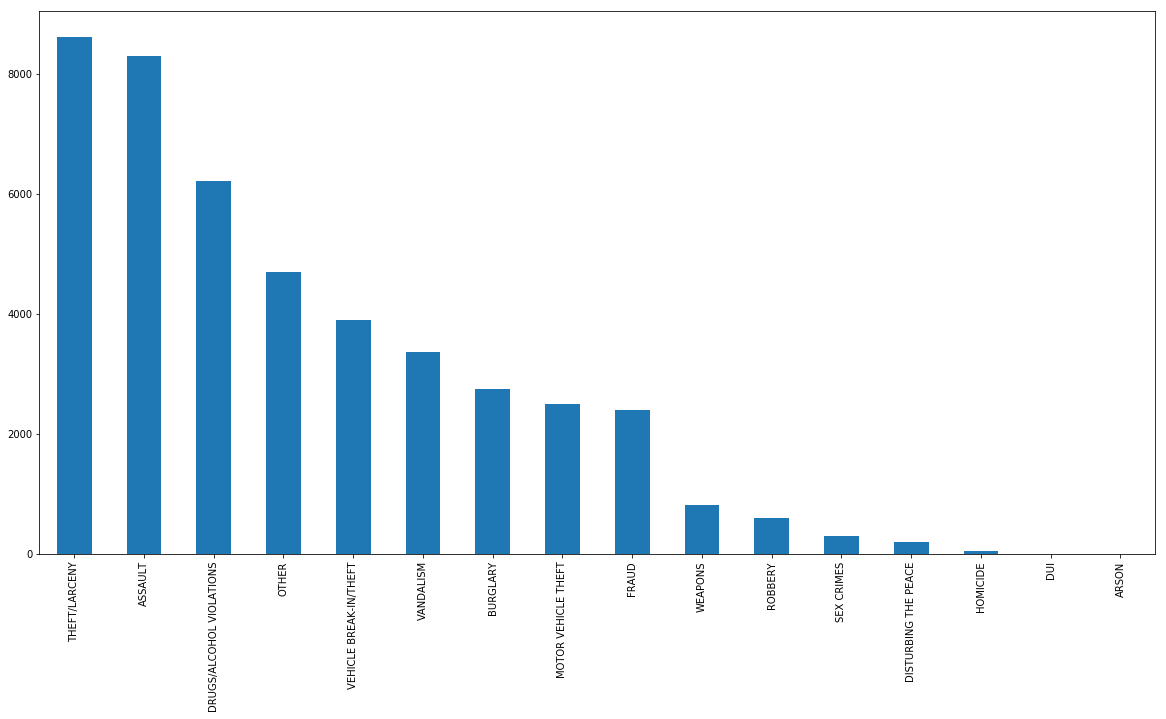

In [36]:
df['CRIME_TYPE'].value_counts().plot(kind='bar')

The relative frequencies of each type of reported crime.

In [37]:
df['Time_Difference'] = (df.DATE_REPORTED - df.DATE_OCCURED).dt.total_seconds() / 60

In [38]:
df_immediate = df.loc[(df.Time_Difference == 0)]

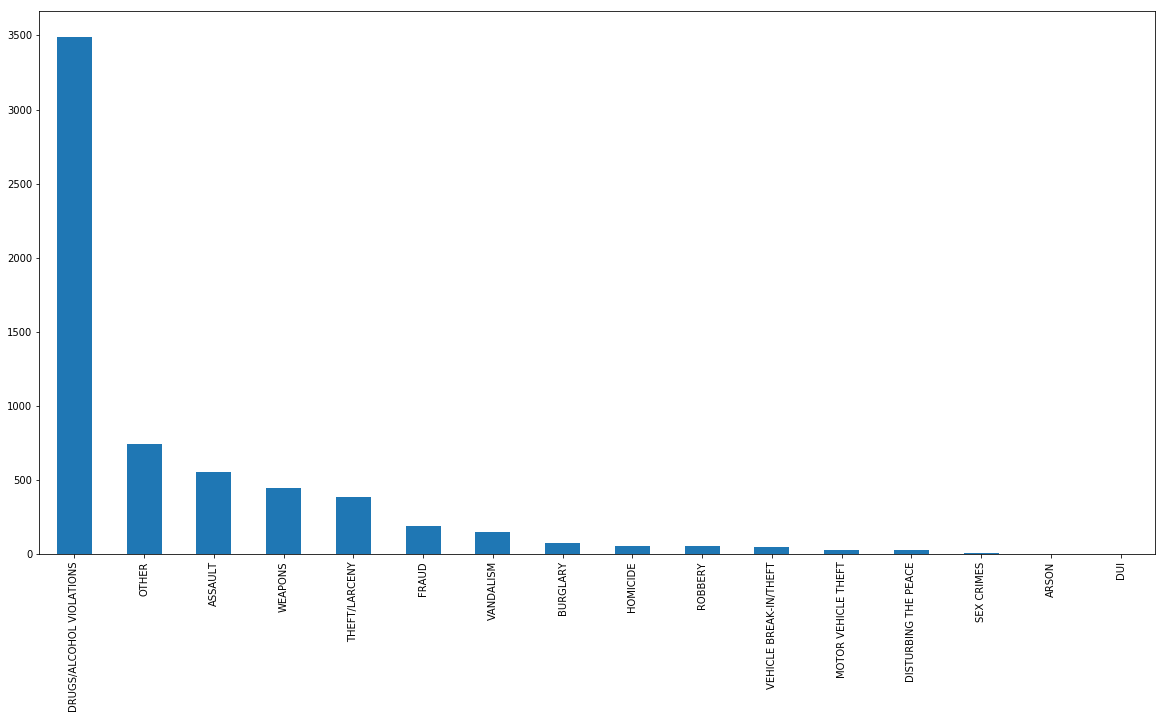

In [39]:
df_immediate['CRIME_TYPE'].value_counts().plot(kind='bar')

These crimes were likely observed by police on patrol, as the the crime was reported at the same time it was observed. Notice the prevalence of Drug/Alcohol Violations.

In [40]:
df_recent = df.loc[(df.Time_Difference < 15) & (df.Time_Difference > 0)]

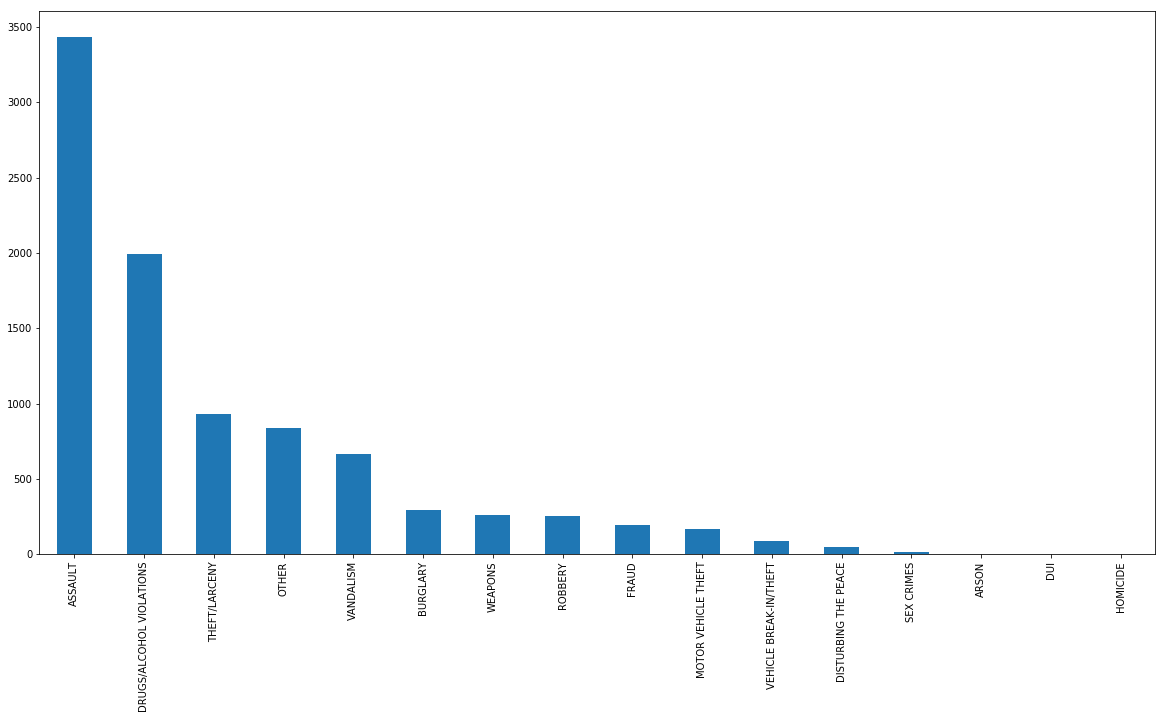

In [41]:
df_recent['CRIME_TYPE'].value_counts().plot(kind='bar')

These crimes were likely reported by witnesses or victims within 15 minutes of the crime occuring. Notice that Assault is now the most frequent type of crime. These crimes are likely to benefit most from a quick response time. We will analyze these crimes further.

In [42]:
df_assaults = df_recent.loc[(df_recent.CRIME_TYPE == 'ASSAULT')]

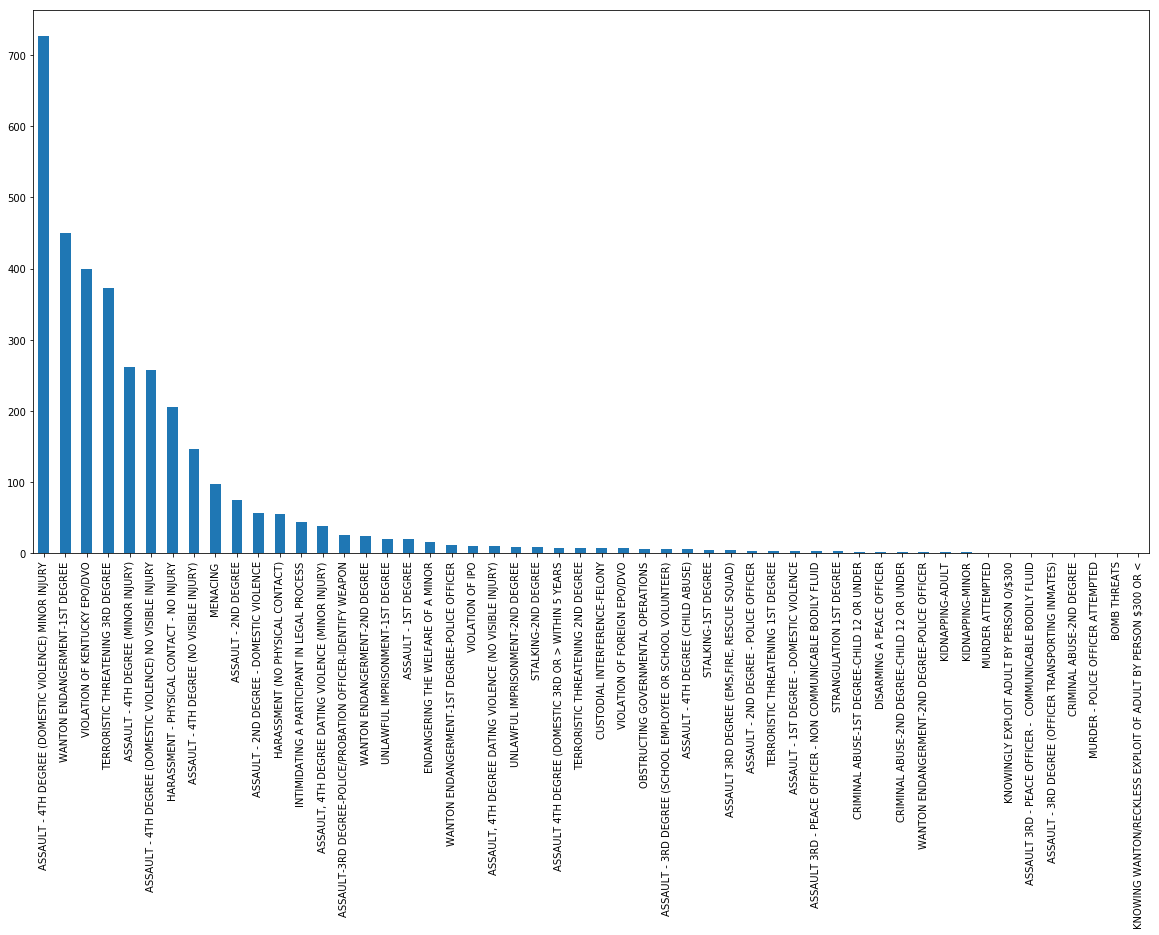

In [43]:
df_assaults['UOR_DESC'].value_counts().plot(kind='bar')

Uniform Offense Codes for all Assaults reported within 15 minutes.

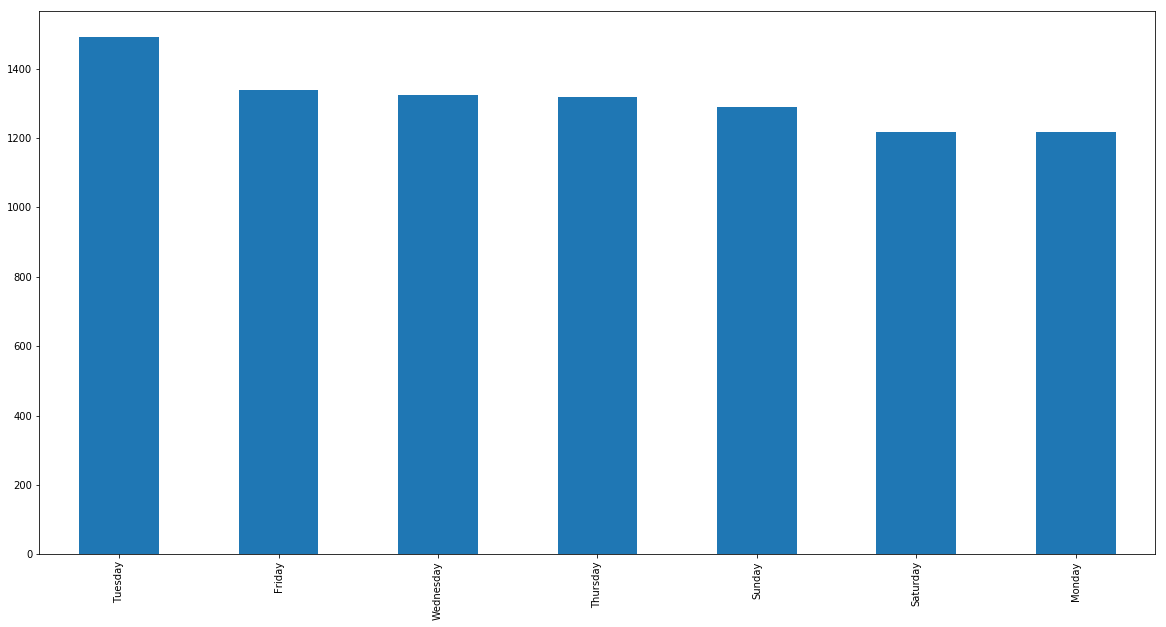

In [44]:
df_recent['DAY'].value_counts().plot(kind='bar')

Tuesday has the highest number of crimes reported within 15 minutes.

In [45]:
monday = df_recent.loc[df_recent.DAY == 'Monday']
tuesday = df_recent.loc[df_recent.DAY == 'Tuesday']
wednesday = df_recent.loc[df_recent.DAY == 'Wednesday']
thursday = df_recent.loc[df_recent.DAY == 'Thursday']
friday = df_recent.loc[df_recent.DAY == 'Friday']
saturday = df_recent.loc[df_recent.DAY == 'Saturday']
sunday = df_recent.loc[df_recent.DAY == 'Sunday']

<function matplotlib.pyplot.show(*args, **kw)>

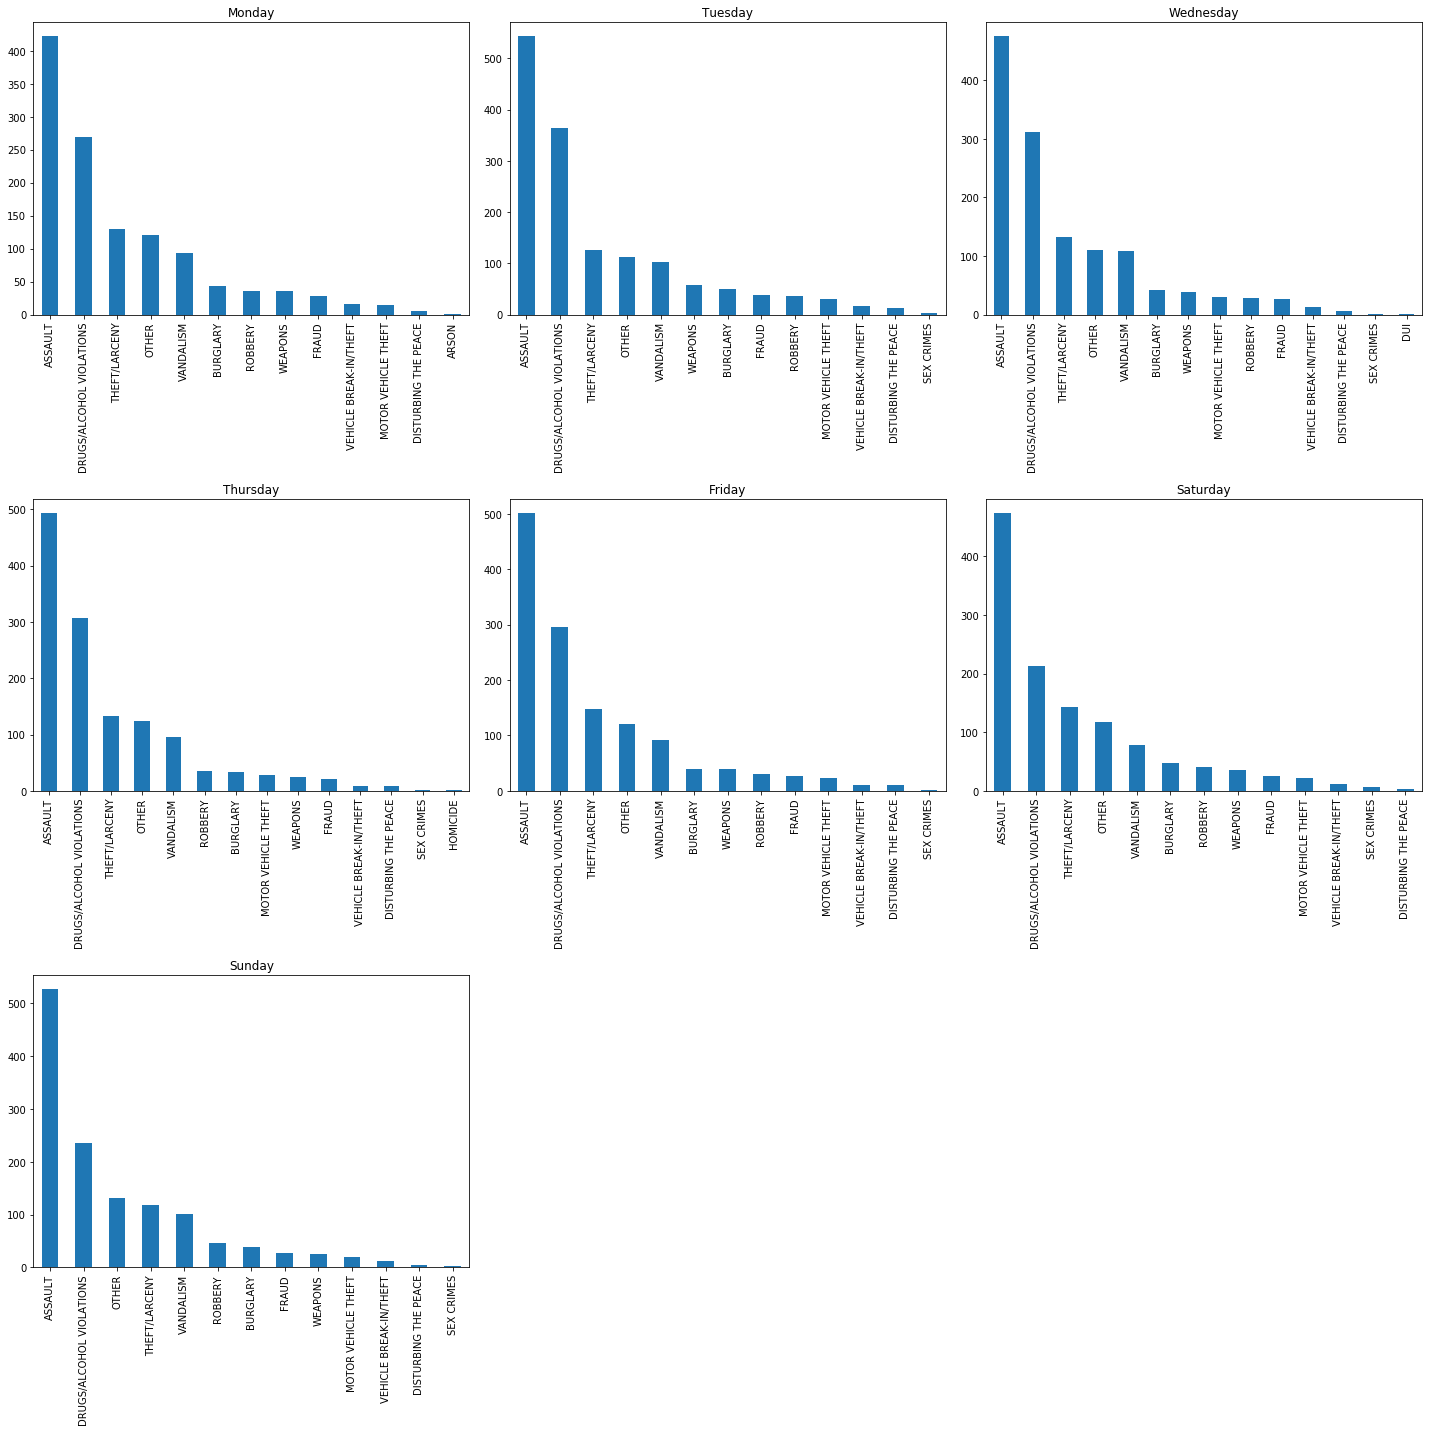

In [46]:
plt.rcParams["figure.figsize"] = (20,20)

plt.subplot(3, 3, 1)
monday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Monday')

plt.subplot(3, 3, 2)
tuesday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Tuesday')

plt.subplot(3, 3, 3)
wednesday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Wednesday')

plt.subplot(3, 3, 4)
thursday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Thursday')
                                           
plt.subplot(3, 3, 5)
friday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Friday')
                                           
plt.subplot(3, 3, 6)
saturday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Saturday')
                                           
plt.subplot(3, 3, 7)
sunday['CRIME_TYPE'].value_counts().plot(kind='bar', title='Sunday')

plt.tight_layout()
plt.show

Crime distributions are similar for each day of the week. On Sundays OTHER replaces THEFT/LARCENY as the third most frequent type of crime.

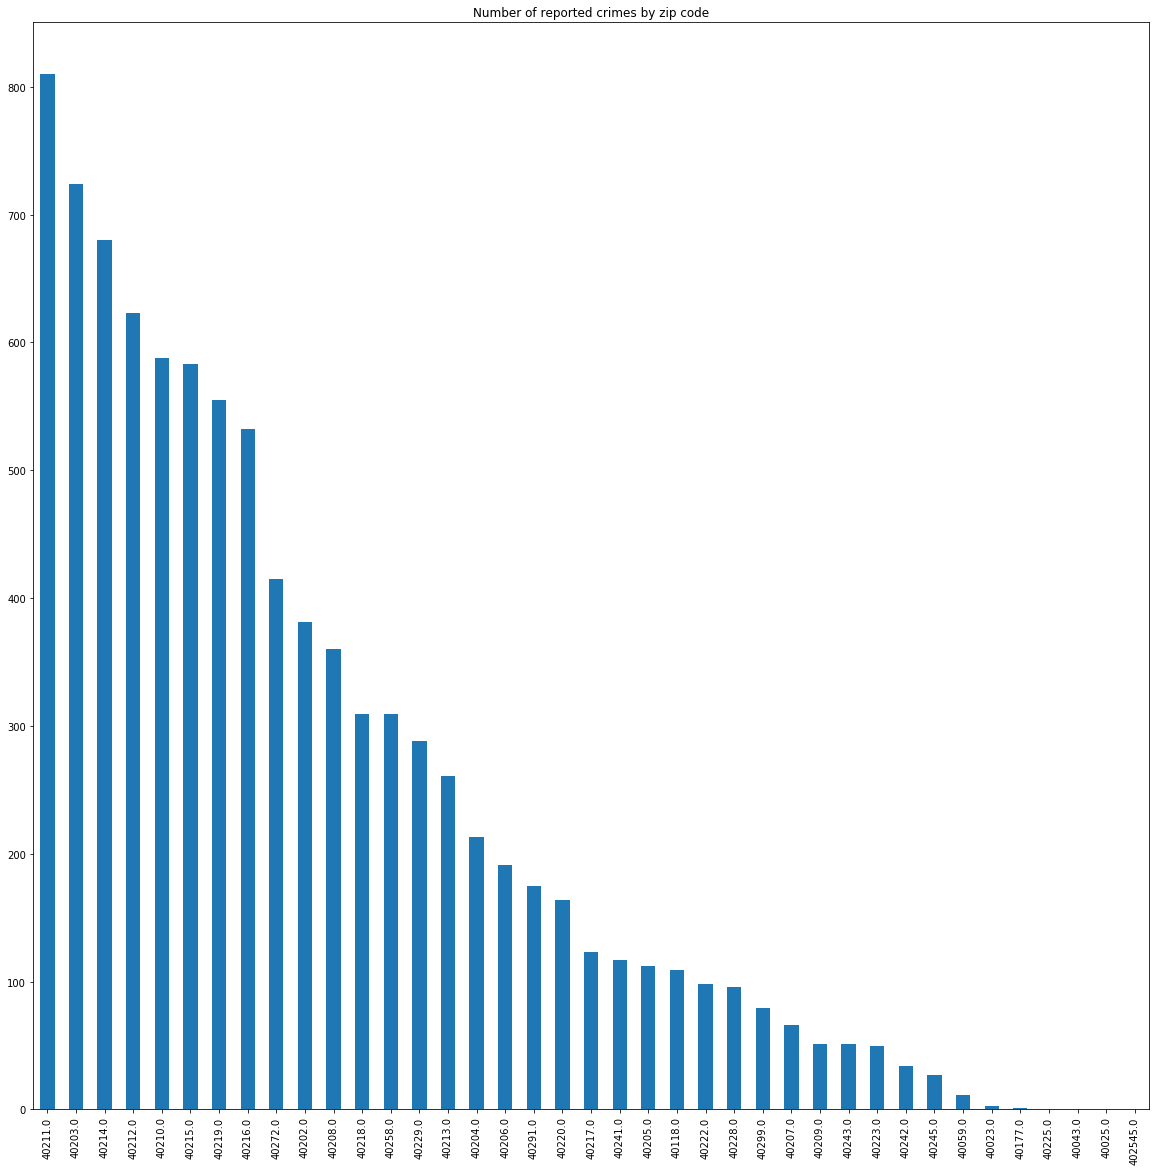

In [48]:
df_recent['ZIP_CODE'].value_counts().plot(kind='bar', title='Number of Reported Crimes By Zip Code')

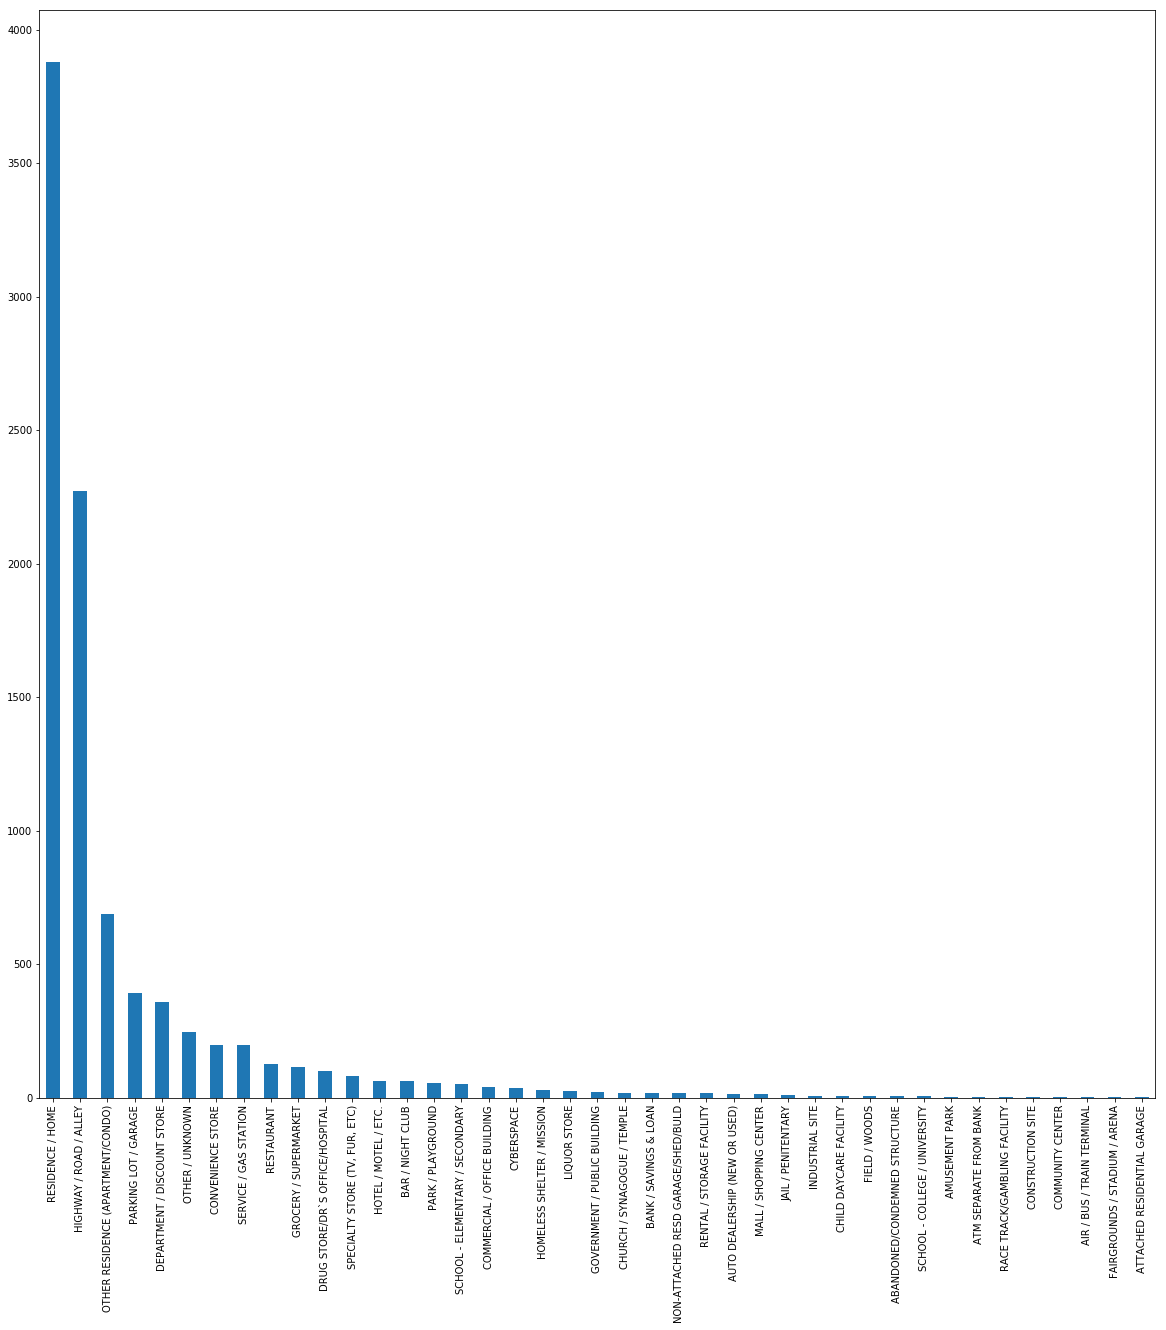

In [49]:
df_recent['PREMISE_TYPE'].value_counts().plot(kind='bar')